# Классификация

## Подготовка данных

1) Подключение необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                
import matplotlib.pyplot as plt            
%matplotlib inline

2) Загрузка данных

In [2]:
df = pd.read_csv("Datasets/Train.csv")
print("Данные загружены:")
df.head(5)

Данные загружены:


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.tail(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


3) Анализ исходных данных

In [4]:
print("Размер датасета: ", df.shape)
print("Количество пропусков: \n", df.isnull().sum())
print("Количество дубликатов: ", df.duplicated().sum())

Размер датасета:  (10999, 12)
Количество пропусков: 
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64
Количество дубликатов:  0


In [5]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

После анализа исходных данных можно сделать вывод о том, что типы данных корректны, а размер датасета удовлетворяет требованиям задания.
Однако, в датасете отсутствуют пропуски, поэтому создадим их искусственно:

In [6]:
np.random.seed(15)
target_columns = ["Customer_care_calls", "Customer_rating", "Product_importance"]
for col in target_columns:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

Проверим результат:

In [7]:
print("Размер датасета: ", df.shape)
print("Количество пропусков: \n", df.isnull().sum())
print("Количество дубликатов: ", df.duplicated().sum())

Размер датасета:  (10999, 12)
Количество пропусков: 
 ID                       0
Warehouse_block          0
Mode_of_Shipment         0
Customer_care_calls    550
Customer_rating        550
Cost_of_the_Product      0
Prior_purchases          0
Product_importance     550
Gender                   0
Discount_offered         0
Weight_in_gms            0
Reached.on.Time_Y.N      0
dtype: int64
Количество дубликатов:  0


В ходе анализа было принято решение удалить колонку ID, так как она не имеет смысловой нагрузки при обучении модели, а просто является порядковым номером. Также эта колонка может снизить качество прогнозирования моделей.

In [8]:
df = df.drop('ID', axis=1)
df.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4.0,2.0,177,3,low,F,44,1233,1
1,F,Flight,4.0,5.0,216,2,low,M,59,3088,1
2,A,Flight,2.0,2.0,183,4,low,M,48,3374,1
3,B,Flight,3.0,3.0,176,4,medium,M,10,1177,1
4,C,Flight,2.0,2.0,184,3,medium,F,46,2484,1


Переименование столбцов для улучшения читаемости

In [9]:
df = df.rename(columns={"Warehouse_block":"Warehouse", "Mode_of_Shipment": "Shipment", "Customer_care_calls": "Care_calls", "Customer_rating": "C-Rating", "Cost_of_the_Product": "Price", "Prior_purchases": "Purchases", "Product_importance": "P-Importance", "Gender": "Gender", "Discount_offered": "Discount", "Weight_in_gms": "Weight", "Reached.on.Time_Y.N": "On_time"})
df.head(5)

,Warehouse,Shipment,Care_calls,C-Rating,Price,Purchases,P-Importance,Gender,Discount,Weight,On_time
0,D,Flight,4.0,2.0,177,3,low,F,44,1233,1
1,F,Flight,4.0,5.0,216,2,low,M,59,3088,1
2,A,Flight,2.0,2.0,183,4,low,M,48,3374,1
3,B,Flight,3.0,3.0,176,4,medium,M,10,1177,1
4,C,Flight,2.0,2.0,184,3,medium,F,46,2484,1


В датасете отсутствуют дубликаты, поэтому необходимо только избавиться от пропусков. Было принято решение сохранить записи содержащие пропуски, а сами пропуски заменить по следующему принципу: если пропуск находится в числовом признаке, то он заменяется на медиану колонки, а если пропуск находится в категориальном признаке, то он заменяется на значение следующим образом: .

In [10]:
# Заполнение пропусков в числовых признаках
for col in ["Care_calls", "C-Rating"]:
    df[col] = df[col].fillna(df[col].median())

In [11]:
# Заполнение пропусков в категориальных признаках
for col in ["P-Importance"]:
    df[col] = df[col].fillna(df[col].mode()[0])

Проверка результатов:

In [12]:
print("Размер датасета: ", df.shape)
print("Количество пропусков: \n", df.isnull().sum())
print("Количество дубликатов: ", df.duplicated().sum())

Размер датасета:  (10999, 11)
Количество пропусков: 
 Warehouse       0
Shipment        0
Care_calls      0
C-Rating        0
Price           0
Purchases       0
P-Importance    0
Gender          0
Discount        0
Weight          0
On_time         0
dtype: int64
Количество дубликатов:  0


### Визуализация данных

1) Построение boxplot для различных числовых признаков

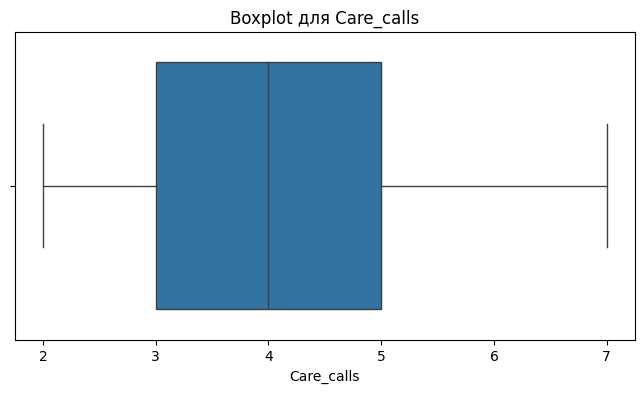

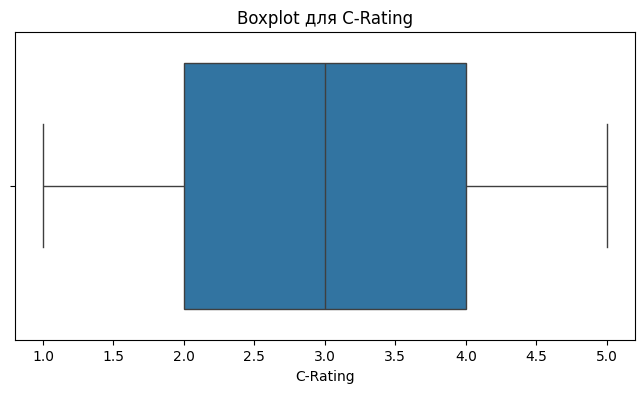

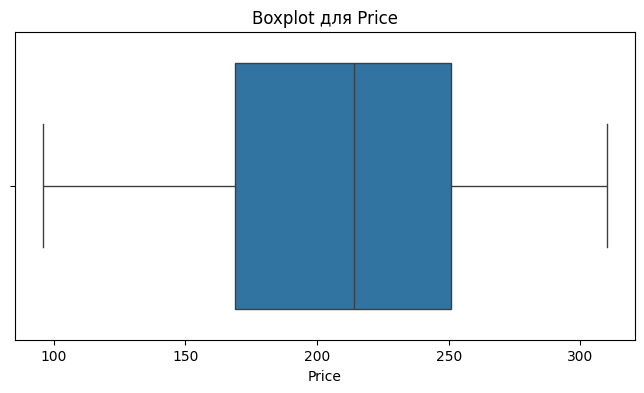

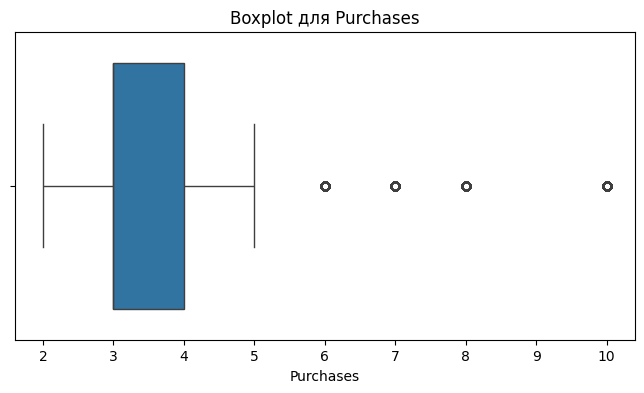

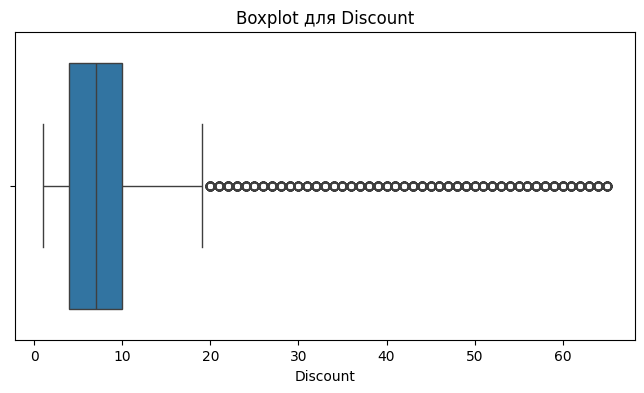

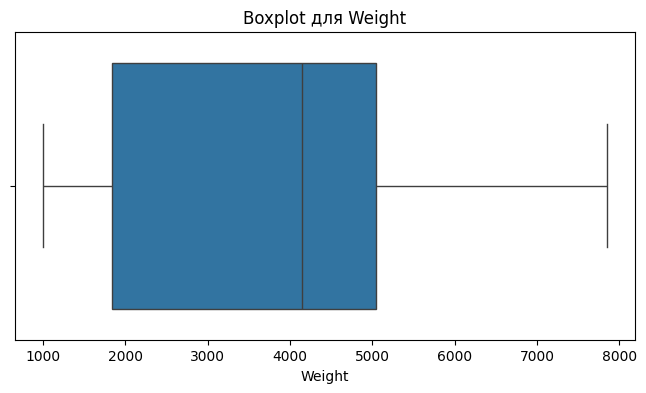

In [13]:
for col in ["Care_calls", "C-Rating", "Price", "Purchases", "Discount", "Weight"]:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot для {col}')

In [14]:
median_value = df['Purchases'].median()
print(f"Медиана Purchases: {median_value}")

Медиана Purchases: 3.0


Из графиков видно, что в большинстве признаков отсутствуют аномальные значения. Однако признак Purchases содержит несколько выбивающихся значений, признак Discount содержит множество выбросов. Эти выбросы стоит проанализировать: для признака Purchases такие данные абсолютно нормальные, так как среди новых покупателей есть и постоянные клиенты с множеством заказов оформленных в прошлом, поэтому выбросы не являются ошибкой и их необходимо оставить. Для признака Discount большое количество выбросов также является нормой, так как на разные товары предоставляется разная скидка, большой размер скидки может свидетельствовать об акциях или распродажах, а не об ошибочных данных, поэтому выбросы можно оставить.   

2) Построение гистограмм для различных числовых признаков

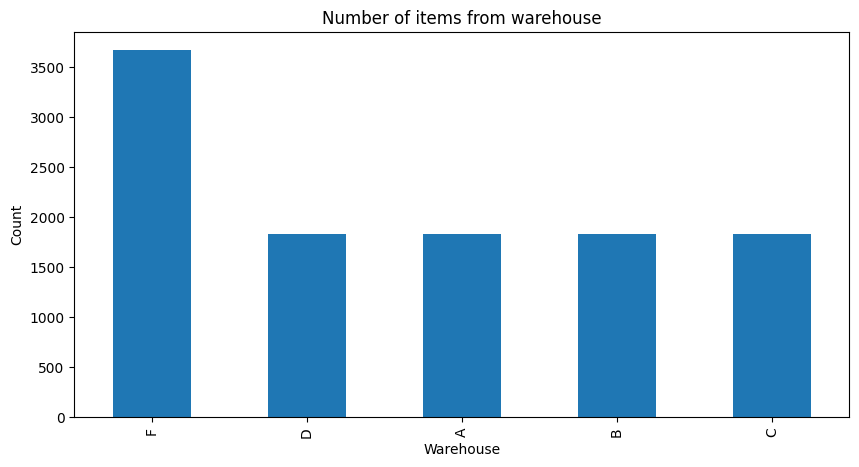

In [15]:
df.Warehouse.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of items from warehouse")
plt.ylabel("Count")
plt.xlabel("Warehouse");

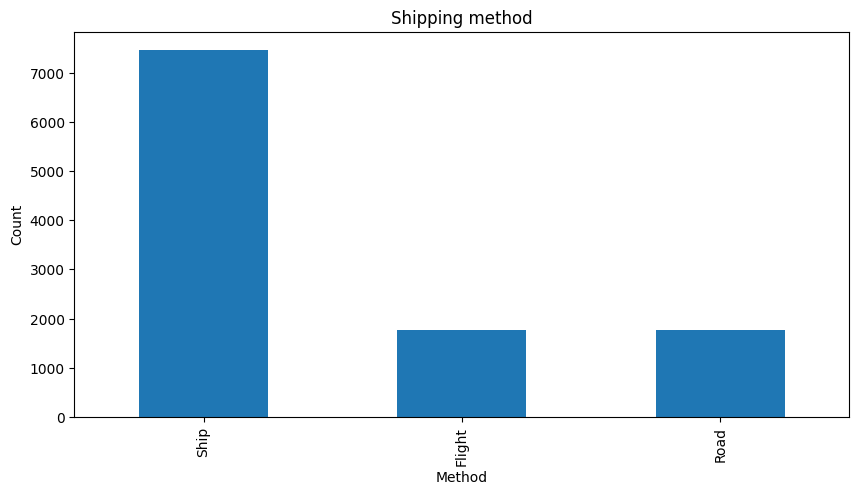

In [16]:
df.Shipment.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Shipping method")
plt.ylabel("Count")
plt.xlabel("Method");

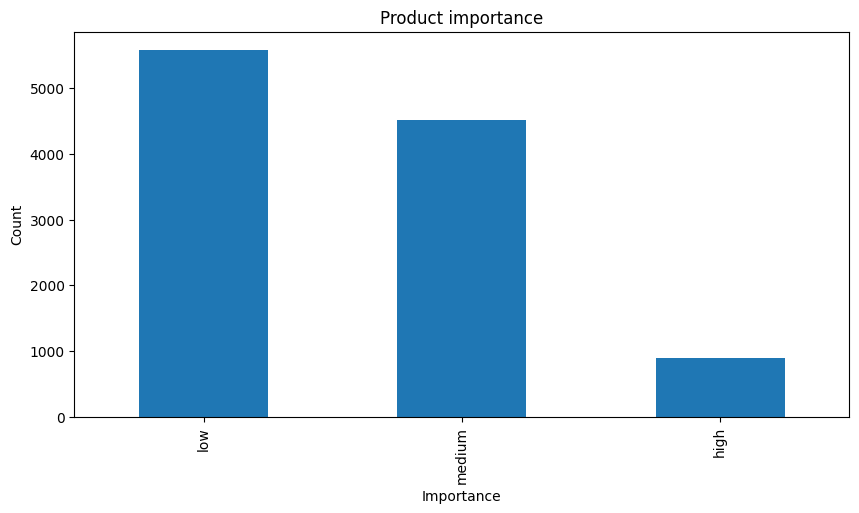

In [17]:
df['P-Importance'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Product importance")
plt.ylabel("Count")
plt.xlabel("Importance");

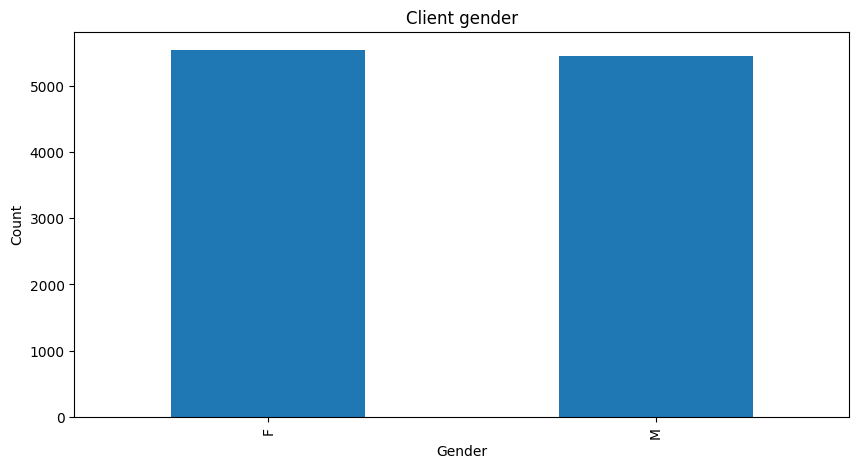

In [18]:
df.Gender.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Client gender")
plt.ylabel("Count")
plt.xlabel("Gender");

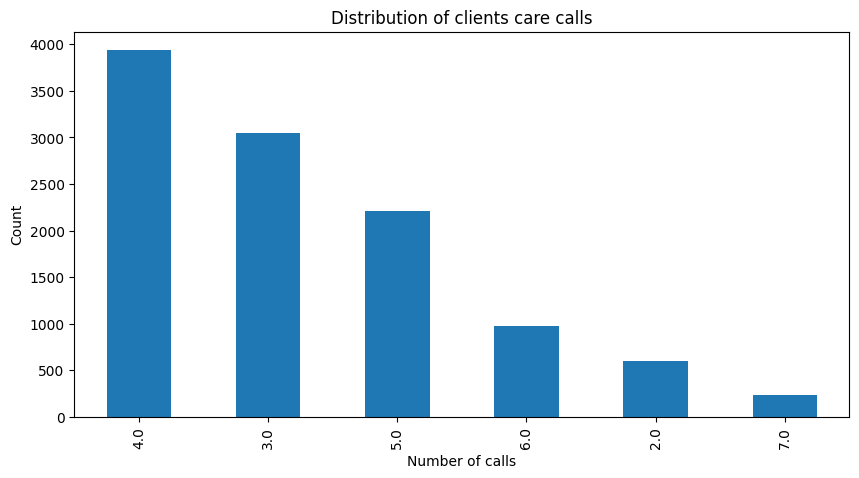

In [19]:
df.Care_calls.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Distribution of clients care calls")
plt.ylabel("Count")
plt.xlabel("Number of calls");

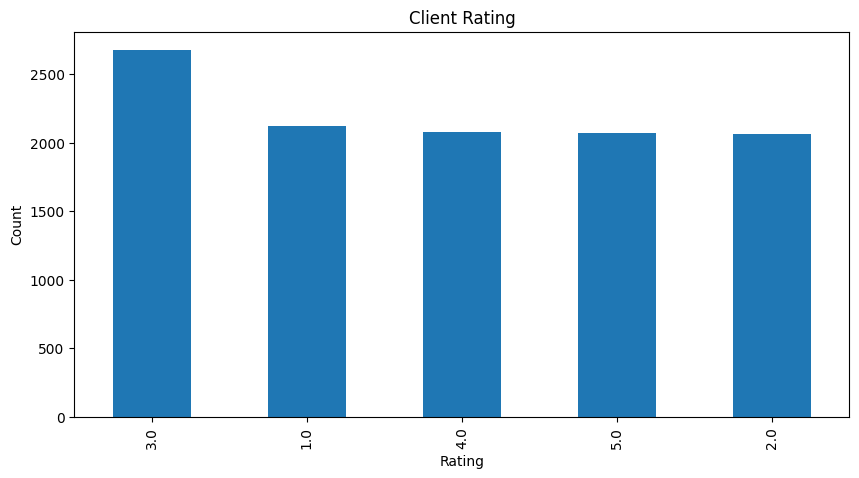

In [20]:
df['C-Rating'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Сlient Rating")
plt.ylabel("Count")
plt.xlabel("Rating");

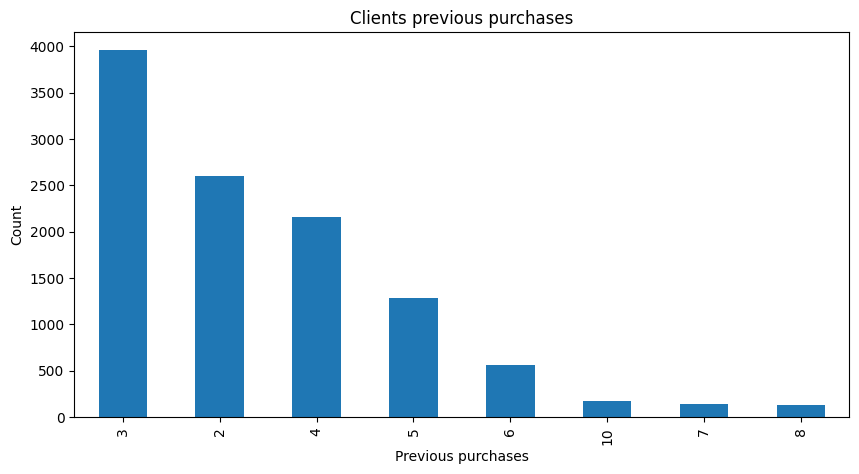

In [21]:
df.Purchases.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Clients previous purchases")
plt.ylabel("Count")
plt.xlabel("Previous purchases");

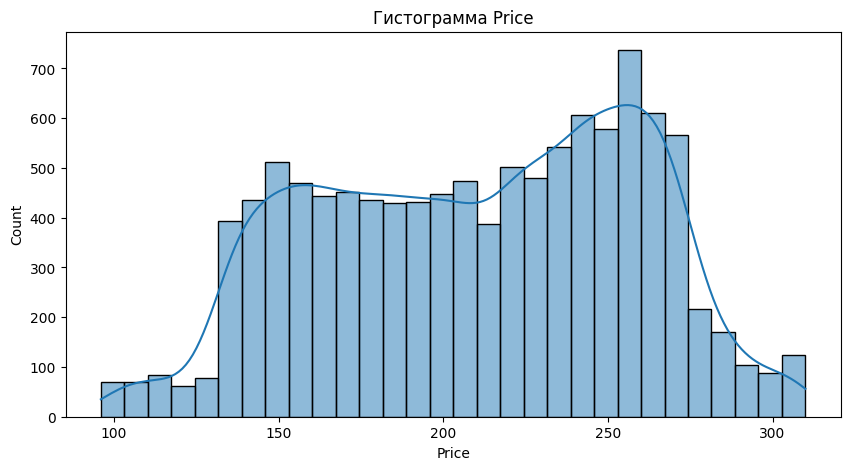

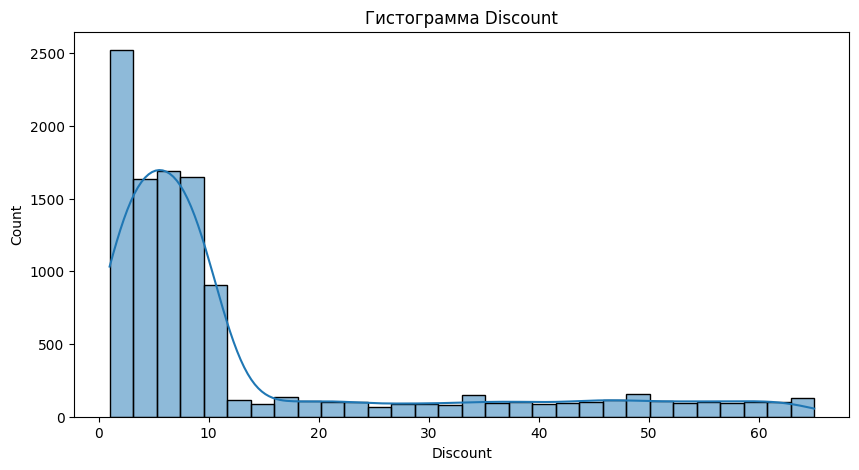

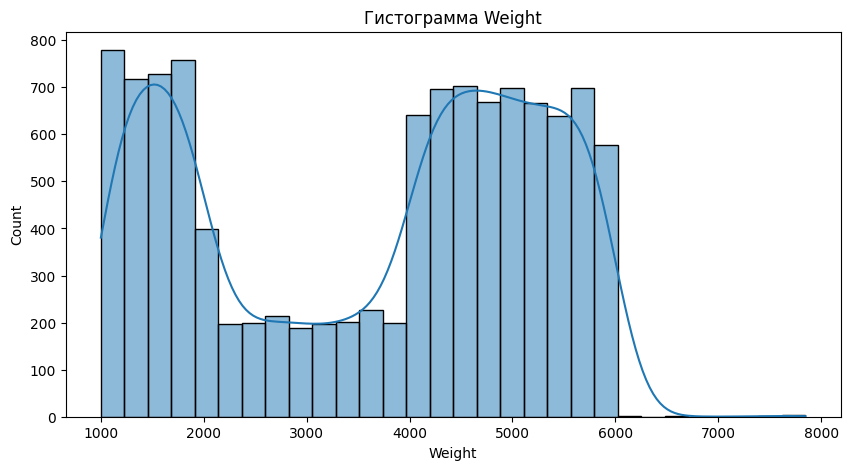

In [22]:
for col in ["Price", "Discount", "Weight"]:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Гистограмма {col}')

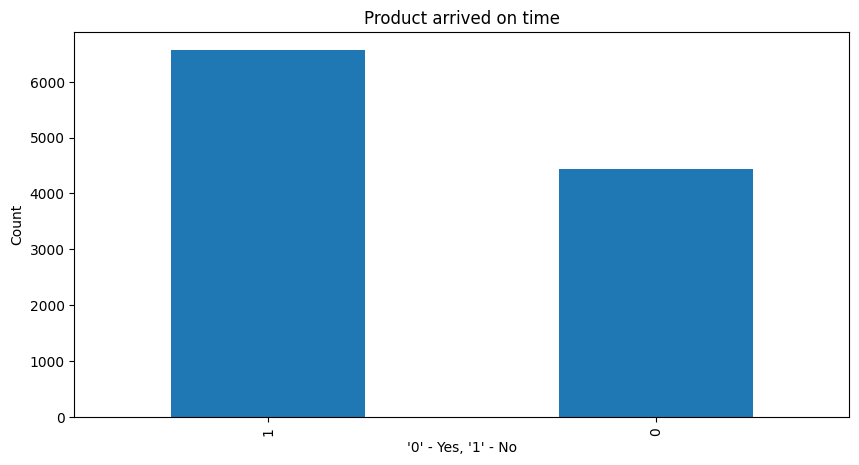

In [23]:
df.On_time.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Product arrived on time")
plt.ylabel("Count")
plt.xlabel("'0' - Yes, '1' - No");

3) Диаграммы рассеяния

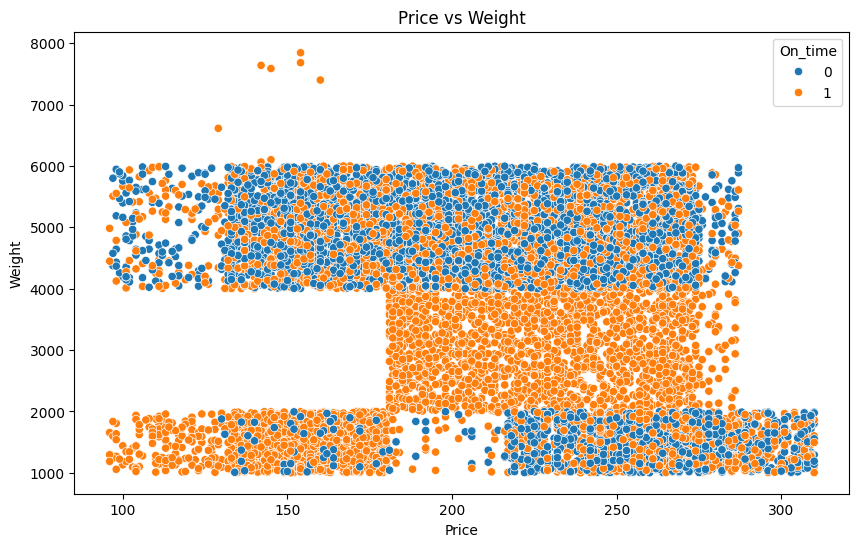

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Price"], y=df["Weight"], hue=df["On_time"])
plt.title("Price vs Weight");

Матрица диаграмм рассеяния

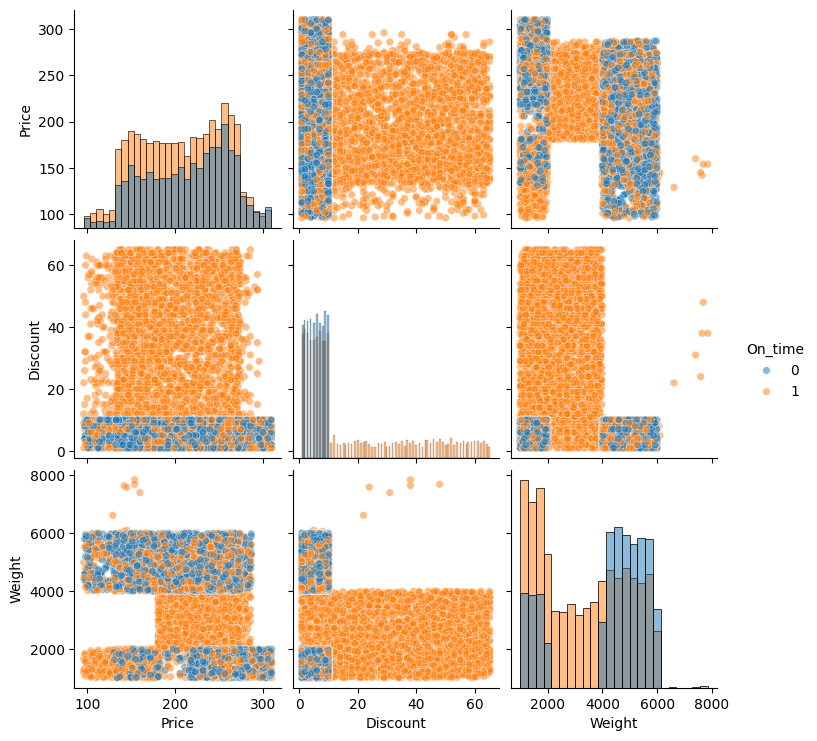

In [25]:
pairplot = sns.pairplot(
    df[["Price", "Discount", "Weight", "On_time"]],
    hue="On_time", 
    diag_kind='hist', 
    corner=False, 
    plot_kws={'alpha':0.5, 's':30}
)

4) Тепловая карта и матрица корреляций

,Care_calls,C-Rating,Price,Purchases,Discount,Weight
Care_calls,1.000000,0.008836,0.317511,0.178159,-0.127794,-0.270712
C-Rating,0.008836,1.000000,0.010701,0.014305,0.000486,-0.004762
Price,0.317511,0.010701,1.000000,0.123676,-0.138312,-0.132604
Purchases,0.178159,0.014305,0.123676,1.000000,-0.082769,-0.168213
Discount,-0.127794,0.000486,-0.138312,-0.082769,1.000000,-0.376067
Weight,-0.270712,-0.004762,-0.132604,-0.168213,-0.376067,1.000000


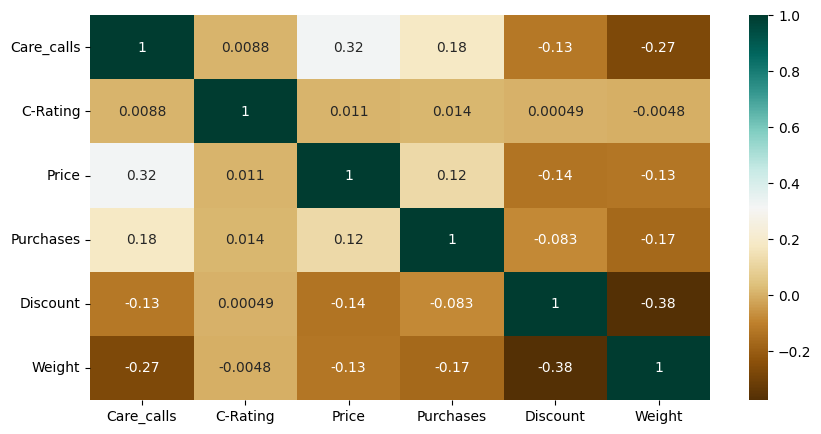

In [26]:
plt.figure(figsize=(10,5))
c = df[["Care_calls", "C-Rating", "Price", "Purchases", "Discount", "Weight"]].corr()
sns.heatmap(c, cmap= "BrBG", annot=True)
c

## Обучение моделей

Перед обучением необходимо закодировать категориальные признаки

In [27]:
from sklearn.preprocessing import LabelEncoder 
df_encoded = df.copy()
# One-Hot Encoding
df_encoded= pd.get_dummies(df_encoded, columns=['Warehouse', 'Shipment'])

# Ordinal Encoding
importance_map = {'low': 0, 'medium': 1, 'high': 2}
df_encoded['P-Importance'] = df_encoded['P-Importance'].map(importance_map)

# Label Encoding
# Female = 0; Male = 1;
le = LabelEncoder()
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])

In [28]:
df_encoded.head(20)

,Care_calls,C-Rating,Price,Purchases,P-Importance,Gender,Discount,Weight,On_time,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship
0,4.0,2.0,177,3,0,0,44,1233,1,False,False,False,True,False,True,False,False
1,4.0,5.0,216,2,0,1,59,3088,1,False,False,False,False,True,True,False,False
2,2.0,2.0,183,4,0,1,48,3374,1,True,False,False,False,False,True,False,False
3,3.0,3.0,176,4,1,1,10,1177,1,False,True,False,False,False,True,False,False
4,2.0,2.0,184,3,1,0,46,2484,1,False,False,True,False,False,True,False,False
5,3.0,1.0,162,3,1,0,12,1417,1,False,False,False,False,True,True,False,False
6,3.0,4.0,250,3,0,0,3,2371,1,False,False,False,True,False,True,False,False
7,4.0,3.0,233,2,0,0,48,2804,1,False,False,False,False,True,True,False,False
8,3.0,4.0,150,3,0,0,11,1861,1,True,False,False,False,False,True,False,False
9,3.0,2.0,164,3,0,0,29,1187,1,False,True,False,False,False,True,False,False


In [29]:
# Проверим типы данных
print(df_encoded.dtypes)

Care_calls         float64
C-Rating           float64
Price                int64
Purchases            int64
P-Importance         int64
Gender               int64
Discount             int64
Weight               int64
On_time              int64
Warehouse_A           bool
Warehouse_B           bool
Warehouse_C           bool
Warehouse_D           bool
Warehouse_F           bool
Shipment_Flight       bool
Shipment_Road         bool
Shipment_Ship         bool
dtype: object


In [30]:
# Преобразуем все bool колонки в int (0/1)
bool_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

df_encoded['Care_calls'] = df_encoded['Care_calls'].astype(int)
df_encoded['C-Rating'] = df_encoded['C-Rating'].astype(int)

print(df_encoded.dtypes)
df_encoded.head(20)

Care_calls         int64
C-Rating           int64
Price              int64
Purchases          int64
P-Importance       int64
Gender             int64
Discount           int64
Weight             int64
On_time            int64
Warehouse_A        int64
Warehouse_B        int64
Warehouse_C        int64
Warehouse_D        int64
Warehouse_F        int64
Shipment_Flight    int64
Shipment_Road      int64
Shipment_Ship      int64
dtype: object


,Care_calls,C-Rating,Price,Purchases,P-Importance,Gender,Discount,Weight,On_time,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship
0,4,2,177,3,0,0,44,1233,1,0,0,0,1,0,1,0,0
1,4,5,216,2,0,1,59,3088,1,0,0,0,0,1,1,0,0
2,2,2,183,4,0,1,48,3374,1,1,0,0,0,0,1,0,0
3,3,3,176,4,1,1,10,1177,1,0,1,0,0,0,1,0,0
4,2,2,184,3,1,0,46,2484,1,0,0,1,0,0,1,0,0
5,3,1,162,3,1,0,12,1417,1,0,0,0,0,1,1,0,0
6,3,4,250,3,0,0,3,2371,1,0,0,0,1,0,1,0,0
7,4,3,233,2,0,0,48,2804,1,0,0,0,0,1,1,0,0
8,3,4,150,3,0,0,11,1861,1,1,0,0,0,0,1,0,0
9,3,2,164,3,0,0,29,1187,1,0,1,0,0,0,1,0,0


Масштабирование числовых признаков

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_features = ['Care_calls', 'C-Rating', 'Price', 'Purchases', 'Discount', 'Weight']
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

Разбиение данных на тренировочную и тестовую выборки

In [32]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('On_time', axis=1)
y = df_encoded['On_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 15, test_size = 0.2, stratify=y)

### Метод k-ближайших соседей

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# Сетка параметров
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),  
    knn_params,             
    cv=5,                    
    scoring='f1',      
    n_jobs=-1   # использование всех ядер
)
knn_grid.fit(X_train, y_train)
print("Лучшие параметры:", knn_grid.best_params_)
print("KNN - Лучший F1 на валидации:", knn_grid.best_score_)

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
KNN - Лучший F1 на валидации: 0.6950961594526316


In [34]:
from sklearn.metrics import classification_report, confusion_matrix,  ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, accuracy_score
best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]  # вероятности ОПОЗДАНИЙ (класс 1)

print("KNN - Результаты на тестовых данных")
print(classification_report(y_test, y_pred_knn))
print("ROC-AUC score:", roc_auc_score(y_test, y_proba_knn))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN - Результаты на тестовых данных
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       887
           1       0.71      0.69      0.70      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.64      0.64      2200

ROC-AUC score: 0.7000109906056081
KNN Accuracy: 0.6436363636363637


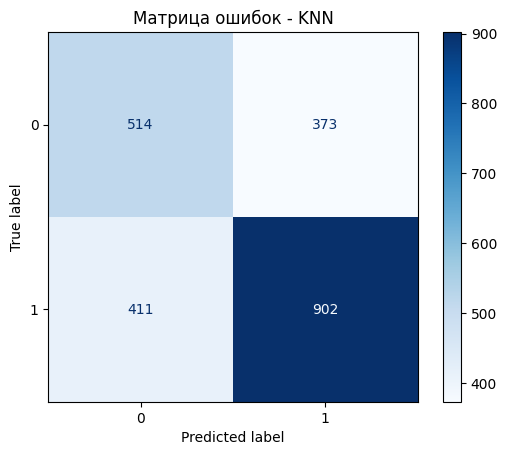

In [35]:
# Вычисляем матрицу ошибок
cm = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Матрица ошибок - KNN')
plt.show()

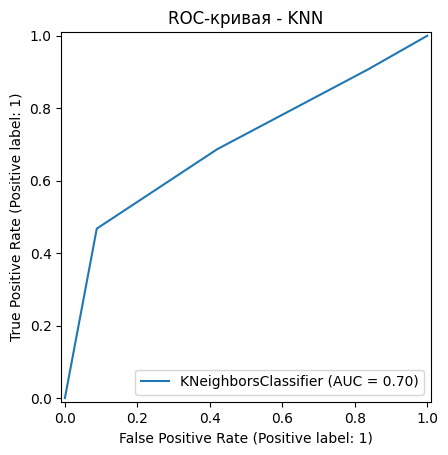

In [36]:
RocCurveDisplay.from_estimator(best_knn, X_test, y_test)
plt.title("ROC-кривая - KNN")
plt.show()

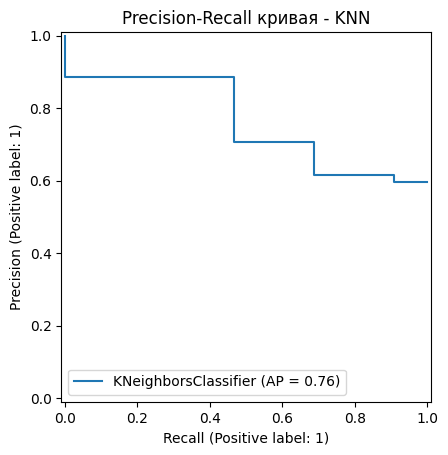

In [37]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(best_knn, X_test, y_test)
plt.title("Precision-Recall кривая - KNN")
plt.show()

### Машина опорных векторов (SVM)

In [44]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'class_weight': [None, 'balanced']
}
svm = SVC(probability=True, random_state=15)
grid_search = GridSearchCV(
    svm, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1,
)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший ROC-AUC на валидации:", grid_search.best_score_)

Лучшие параметры: {'C': 0.1, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}
Лучший ROC-AUC на валидации: 0.7312960648706531


In [45]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("SVM - Результаты на тестовых данных")
print(classification_report(y_test, y_pred))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred_proba))
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

SVM - Результаты на тестовых данных
              precision    recall  f1-score   support

           0       0.56      0.83      0.67       887
           1       0.83      0.56      0.67      1313

    accuracy                           0.67      2200
   macro avg       0.69      0.69      0.67      2200
weighted avg       0.72      0.67      0.67      2200

ROC-AUC score: 0.7419723500404849
SVM Accuracy: 0.6659090909090909


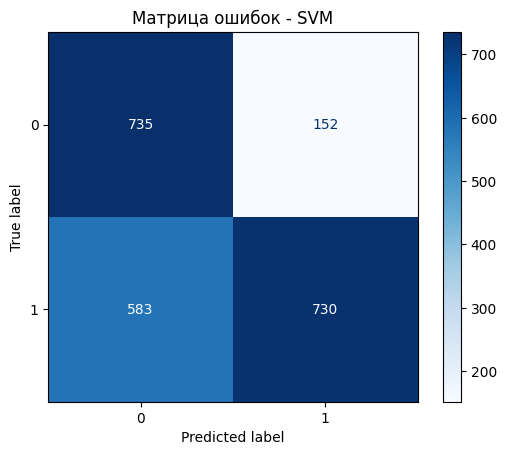

In [46]:
# Вычисляем матрицу ошибок
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Матрица ошибок - SVM')
plt.show()

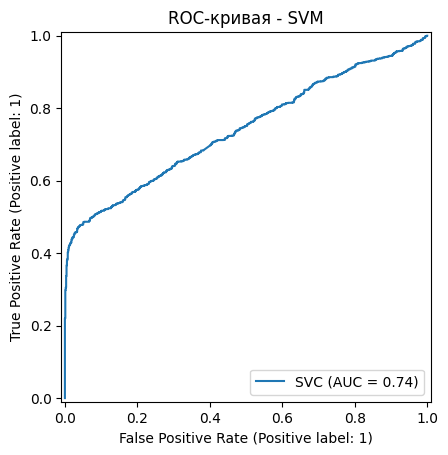

In [47]:
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC-кривая - SVM")
plt.show()

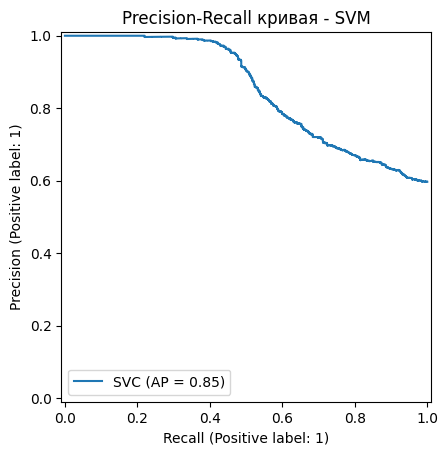

In [48]:
PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Precision-Recall кривая - SVM")
plt.show()

### Случайный лес

In [70]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200, 300],          
    'max_depth': [5, 7, 10],             
    'min_samples_split': [10, 15, 20, 25],          
    'min_samples_leaf': [7, 10, 12],            
    'max_features': ['sqrt', 'log2'],   
    'class_weight': ['balanced', 'balanced_subsample']
}

# Создаем модель
rf = RandomForestClassifier(
    random_state=15,
    n_jobs=-1,
    bootstrap=True,
    max_samples=None
)

grid_rf = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
)
grid_rf.fit(X_train, y_train)
print("Лучшие параметры:", grid_rf.best_params_)
print("Лучший ROC-AUC на валидации:", grid_rf.best_score_)

Лучшие параметры: {'class_weight': 'balanced_subsample', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 25, 'n_estimators': 50}
Лучший ROC-AUC на валидации: 0.7409105830091031


In [71]:
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]

print("RF - Результаты на тестовых данных")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred_proba_rf))
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))

RF - Результаты на тестовых данных
              precision    recall  f1-score   support

           0       0.56      0.98      0.72       887
           1       0.97      0.49      0.65      1313

    accuracy                           0.69      2200
   macro avg       0.77      0.74      0.68      2200
weighted avg       0.81      0.69      0.68      2200

ROC-AUC score: 0.750386173818145
RF Accuracy: 0.6877272727272727


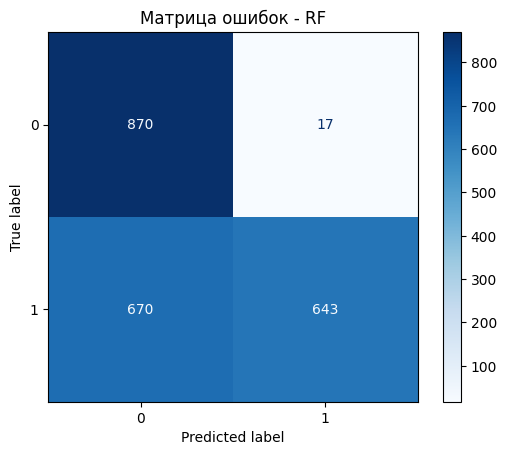

In [90]:
# Вычисляем матрицу ошибок
cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Матрица ошибок - RF')
plt.show()

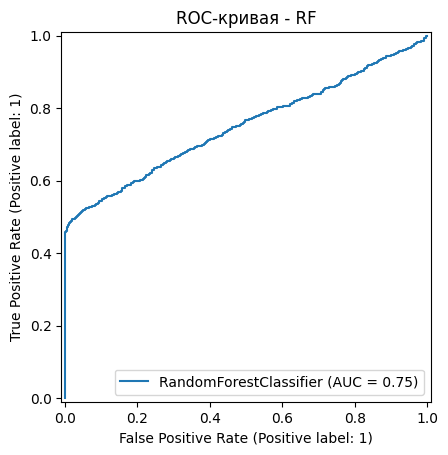

In [89]:
RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("ROC-кривая - RF")
plt.show()

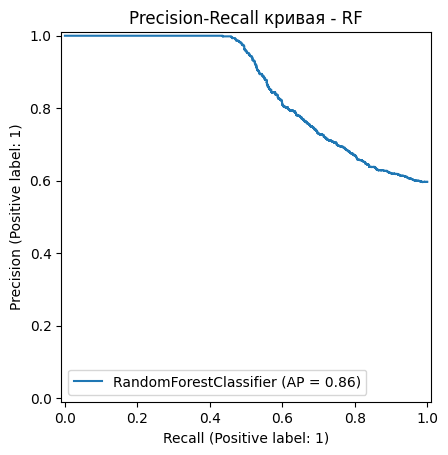

In [88]:
PrecisionRecallDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("Precision-Recall кривая - RF")
plt.show()

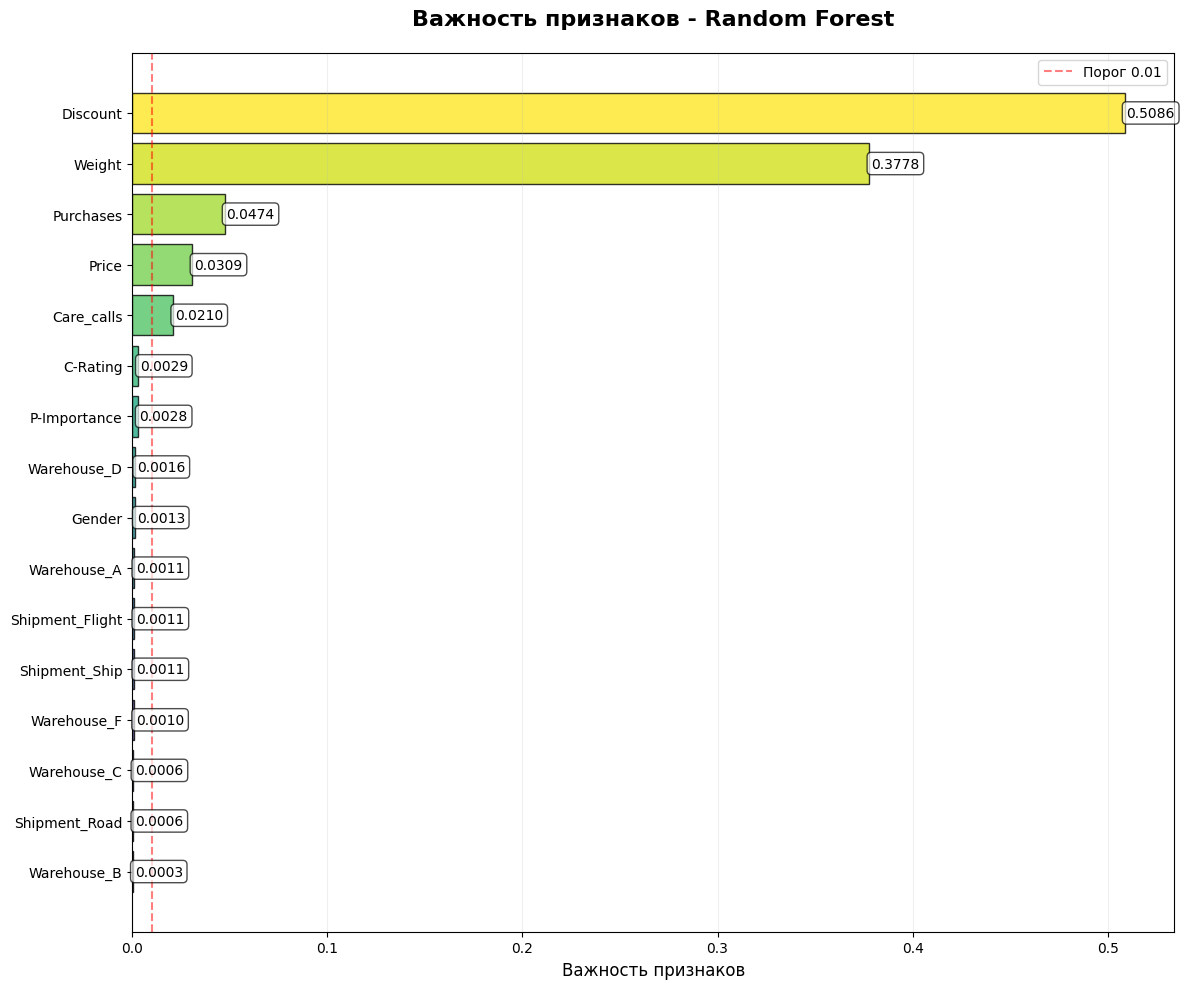

In [87]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=True)

# Создаем цветовую градацию
colors = plt.cm.viridis(np.linspace(0, 1, len(importance_df)))

plt.figure(figsize=(12, 10))
bars = plt.barh(importance_df['feature'], importance_df['importance'], 
                color=colors, edgecolor='black', alpha=0.8)

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

plt.xlabel('Важность признаков', fontsize=12)
plt.title('Важность признаков - Random Forest', 
          fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.2)
plt.axvline(x=0.01, color='red', linestyle='--', alpha=0.5, label='Порог 0.01')
plt.legend()
plt.tight_layout()